In [8]:
%load_ext autoreload
%autoreload 2


import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct

import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

# CStree from Figure 1 in (Duarte & Solus, 2022)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0 []
1 [<cstrees.cstree.Stage object at 0x7f2d2615bb80>]
2 [<cstrees.cstree.Stage object at 0x7f2d17a6c2e0>, <cstrees.cstree.Stage object at 0x7f2d17a6c580>, <cstrees.cstree.Stage object at 0x7f2d17a6c970>]
3 []
[[1 0 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 0 1]]
level 0 in the tree scoring procedure
singleton stage
None
singleton stage
None
singleton stage
None
singleton stage
None
singleton stage
None
None: {1: 3, 0: 2}
level 1 in the tree scoring procedure
singleton stage
None
singleton stage
None
singleton stage
None
singleton stage
None
singleton stage
None
None: {0: 3, 1: 2}
level 2 in the tree scoring procedure
singleton stage
None
singleton stage
None
[{0, 1}, 0]: {0: 1, 1: 2}
None: {1: 1, 0: 1}
level 3 in the tree scoring procedure
singleton stage
None
[1, {0, 1}, 0]: {0: 1, 1: 1}
[0, {0, 1}, 1]: {1: 1, 0: 1}
None: {0: 1}
-28.067942322748205


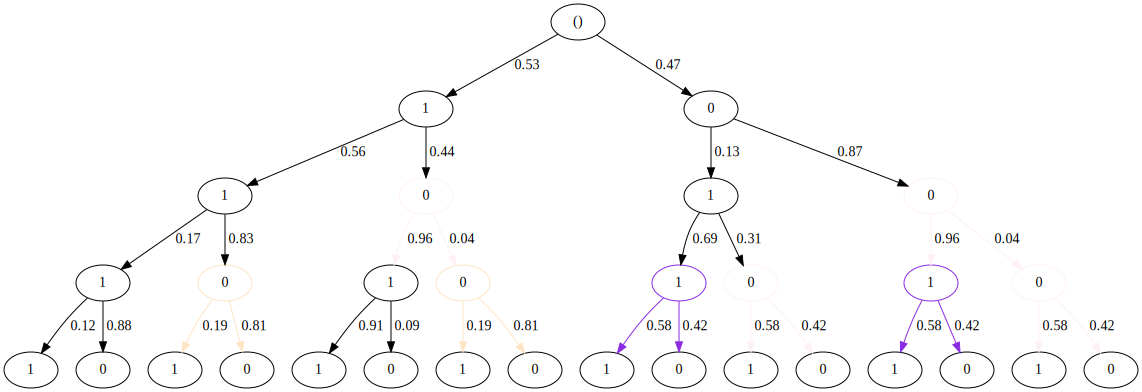

In [9]:
np.random.seed(2)
p=4
cards = [2] * p
co = ct.CausalOrder(range(p))
tree = ct.CStree(co)


#stage = ct.sample_random_stage(cards,2)
#stage.set_random_params(cards)

tree.set_cardinalities(cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.

tree.set_stages({
    0: [],
    1: [ct.Stage([{0, 1}, 0])],    # Green
    2: [ct.Stage([0, {0, 1}, 0]),  # Blue
        ct.Stage([0, {0, 1}, 1]),  # Orange
        ct.Stage([1, {0, 1}, 0])]  # Red
})


tree.set_random_stage_parameters()


a = tree.plot()
a.draw("testplot.png")
x = tree.sample(5)

#x = tree.sample(5)
print(x)

s = sc.score(tree, x, alpha_tot=1.0, method="K2")
print(s)
#rels = tree.csi_relations()

#print("Initial rels")
#print(rels)
adjmats = tree.to_minimal_context_graphs()

for key, graph in adjmats.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw(str(key) + "_csi.png", args='-Glabel="'+str(key)+'"   ')
a

In [ ]:
tree.to_df()

[2, 2, 2, 2]
full_stage_space_size: 2
level: 0, mc: 1, minimal_stage_size: 1
full_stage_space_size: 4
level: 1, mc: 1, minimal_stage_size: 2
full_stage_space_size: 8
level: 2, mc: 1, minimal_stage_size: 4
0 [<cstrees.cstree.Stage object at 0x7f2d15b83850>]
1 [<cstrees.cstree.Stage object at 0x7f2d15b836a0>, <cstrees.cstree.Stage object at 0x7f2d1615f4c0>]
2 [<cstrees.cstree.Stage object at 0x7f2d1615fa90>, <cstrees.cstree.Stage object at 0x7f2d1615f130>]
3 []
[(0,), (1,)]
i  0 ch  (0,) node  ()
Singleton stage
i  1 ch  (1,) node  ()
Singleton stage
[(1, 0), (1, 1)]
i  0 ch  (1, 0) node  (1,)
edge prob 0.31975032820197147
i  1 ch  (1, 1) node  (1,)
edge prob 0.6802496717980285
[(1, 1, 0), (1, 1, 1)]
i  0 ch  (1, 1, 0) node  (1, 1)
edge prob 0.45616875638588705
i  1 ch  (1, 1, 1) node  (1, 1)
edge prob 0.543831243614113
[(1, 1, 1, 0), (1, 1, 1, 1)]
i  0 ch  (1, 1, 1, 0) node  (1, 1, 1)
edge prob 0.9869776996021011
i  1 ch  (1, 1, 1, 1) node  (1, 1, 1)
edge prob 0.013022300397898838
[(1, 

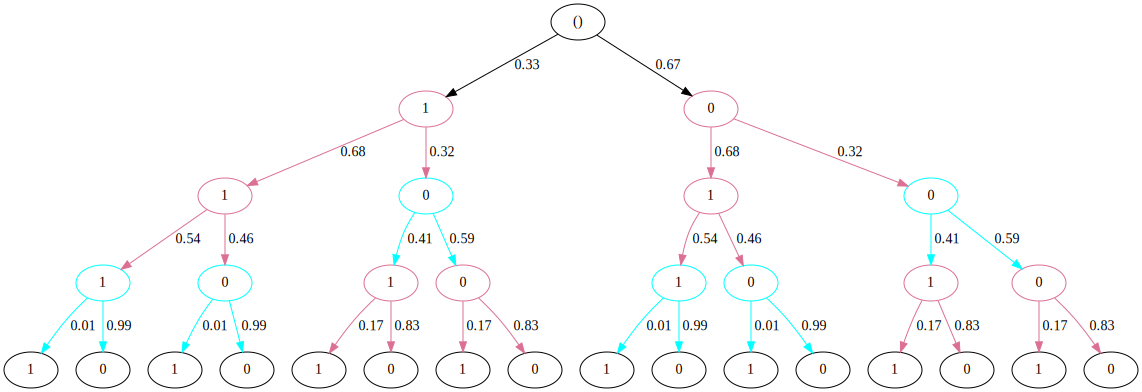

In [32]:

print(cards)
np.random.seed(1)
t = ct.sample_cstree(cards, max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
t.set_random_stage_parameters()
t.create_tree()
t.set_random_parameters()
a = t.plot()
x = t.sample(500)

#plt.savefig("testplot.png")
a



max staging: ['[]']
max staging: ['[0]', '[1]']
max staging: ['[{0, 1}, 0]', '[{0, 1}, 1]']
stages :{0: [<cstrees.cstree.Stage object at 0x7f2d168428e0>], 1: [<cstrees.cstree.Stage object at 0x7f2d15b2b670>, <cstrees.cstree.Stage object at 0x7f2d15b2b7f0>], 2: [<cstrees.cstree.Stage object at 0x7f2d15b2bc10>, <cstrees.cstree.Stage object at 0x7f2d15b2bd90>], 3: [], -1: [<cstrees.cstree.Stage object at 0x7f2d1615f040>]}
Level 0
{<cstrees.cstree.Stage object at 0x7f2d168428e0>: {0: 173, 1: 327}}
[]
[0.3463073852295409, 0.653692614770459]
Level 1
{<cstrees.cstree.Stage object at 0x7f2d15b2b670>: {1: 150, 0: 192}, <cstrees.cstree.Stage object at 0x7f2d15b2b7f0>: {0: 82, 1: 76}}
[0]
[0.5612244897959183, 0.4387755102040816]
[1]
[0.5188679245283019, 0.4811320754716981]
Level 2
{<cstrees.cstree.Stage object at 0x7f2d15b2bc10>: {0: 145, 1: 28}, <cstrees.cstree.Stage object at 0x7f2d15b2bd90>: {0: 325, 1: 2}}
[{0, 1}, 0]
[0.8371757925072046, 0.1628242074927954]
[{0, 1}, 1]
[0.9931297709923664, 0

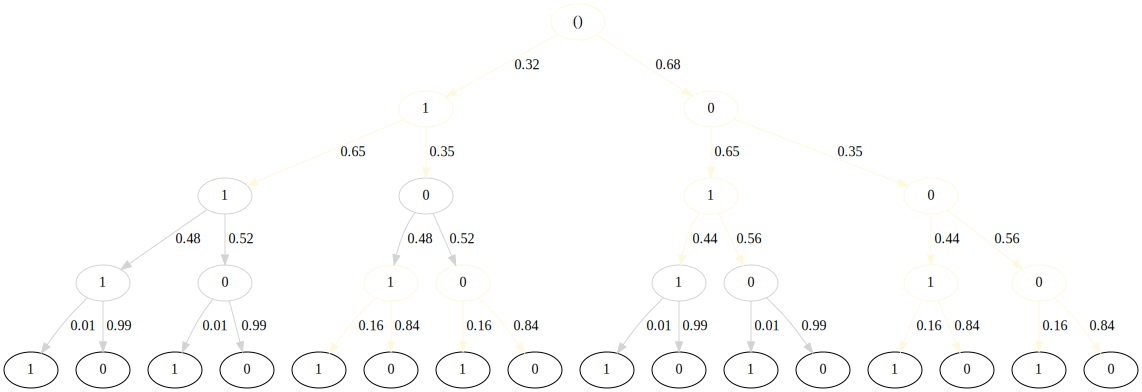

In [33]:
order = [0, 1, 2, 3]
opttree = ct.optimal_cstree(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")

print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
print(x[:,0].sum())
opttree.plot()


In [ ]:

order = [0, 1, 2, 3]
score = sc.score_order(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(score)
 

In [ ]:
stagings = ct.all_stagings(order, cards, level, max_cvars=1)
print("#Stagings")
nst = ct.n_stagings(order, cards, level, max_cvars=1)
print(nst)
print("Stagings")
for ss in stagings:
    for s in ss:
        print(s)

In [ ]:
for l in range(len(order)):
    max_staging, max_score = ct.optimal_staging_at_level(order, cards, x, l, max_cvars=1, alpha_tot=1.0, method="BDeu")
    print("best staging at level {}".format(l))
    print(max_score)   
    for st in max_staging:
        print(st)

    